This notebook is about **TIME SERIES FORECAST**

*Predict Future Sales Dataset* will be used:
[https://www.kaggle.com/c/competitive-data-science-predict-future-sales/data?select=sales_train.csv]

3 different methods will used to see which one suits better for this particular dataset:
* **Triple Exponential Smoothing (Holt-Winter's)**
* **Seasonal Auto Regressive Integrated Moving Average (SARIMA)**
* **Light GBM** 

In **T.E.S.** and **SARIMA** methods, *hyperparameter optimization* will be implemented. 

In **Light GBM**, both *feature engineering* and *hyperparameter optimization* methods will be used. 

For the part of choosing the right method, for simplicity, I will derive monthly total sales and evaluate the methods according to monthly sales forecasts using validation set approach. Years between 2013 and 2016 will be training set and year 2017 will be validation set. MAE will be used for comparing different methods. 

After choosing the method according to best MAE score, I will revise the model using the chosen method and implement it to test set to make forecasts. 

STEP 1: Exploratory Data Analysis
* a-Amount sold at each  store (Monthly)
* b-Amount sold for each item (Monthly)
* c-Outlier/Missing Value Analysis

STEP 2: Forecast sales using T.E.S.

* a-Rearranging the train set into train and validation
* b-Hyperparameter optimization
* c-Fit the model to validation dataset to see results

STEP 3: Forecast sales using SARIMAX

* a-Hyperparameter optimization
* b-Fit the model to validation dataset to see results

STEP 4: Forecast sales using Light GBM

* a-Feature enginnering
* b-Hyperparameter optimization
* c-Fit the model to validation dataset to see results

STEP 5: Forecast sales with daily values using the best method (Lowest MAE score)

* a-Feature enginnering
* b-Hyperparameter optimization
* c-Fit the model to validation dataset to see results

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import datetime as dt
train = pd.read_csv(r'H:\DOWNLOADS\train.csv')
test = pd.read_csv(r'H:\DOWNLOADS\test.csv')

In [3]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
check_df(train)

##################### Shape #####################
(913000, 4)
##################### Types #####################
date     object
store     int64
item      int64
sales     int64
dtype: object
##################### Head #####################
         date  store  item  sales
0  2013-01-01      1     1     13
1  2013-01-02      1     1     11
2  2013-01-03      1     1     14
3  2013-01-04      1     1     13
4  2013-01-05      1     1     10
##################### Tail #####################
              date  store  item  sales
912995  2017-12-27     10    50     63
912996  2017-12-28     10    50     59
912997  2017-12-29     10    50     74
912998  2017-12-30     10    50     62
912999  2017-12-31     10    50     82
##################### NA #####################
date     0
store    0
item     0
sales    0
dtype: int64


In [4]:
data=train

In [5]:
data2=train

In [6]:
i=data.columns
for n in i:
    print('unique values for', n, '=',data[n].nunique())

unique values for date = 1826
unique values for store = 10
unique values for item = 50
unique values for sales = 213


<Figure size 648x432 with 0 Axes>

(array([91300., 91300., 91300., 91300., 91300., 91300., 91300., 91300.,
        91300., 91300.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, ' Distribution')

Text(0, 0.5, 'Frequency')

Text(0.5, 0, 'Store')

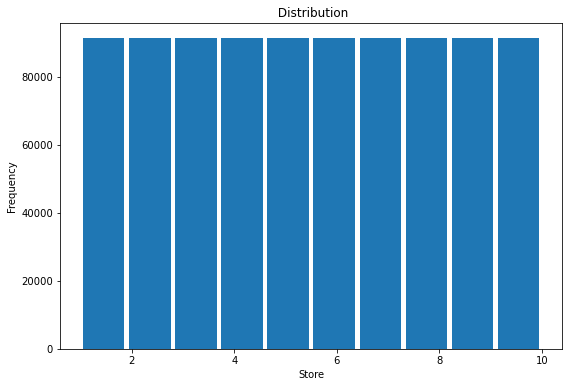

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
plt.hist(data['store'], rwidth=0.9)
plt.title(' Distribution')
plt.ylabel('Frequency')
plt.xlabel('Store')
plt.show()

<Figure size 648x432 with 0 Axes>

(array([1.41304e+05, 3.09995e+05, 2.32808e+05, 1.36482e+05, 6.28770e+04,
        2.25590e+04, 5.86500e+03, 1.00900e+03, 9.60000e+01, 5.00000e+00]),
 array([  0. ,  23.1,  46.2,  69.3,  92.4, 115.5, 138.6, 161.7, 184.8,
        207.9, 231. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, ' Distribution')

Text(0, 0.5, 'Frequency')

Text(0.5, 0, 'Sales')

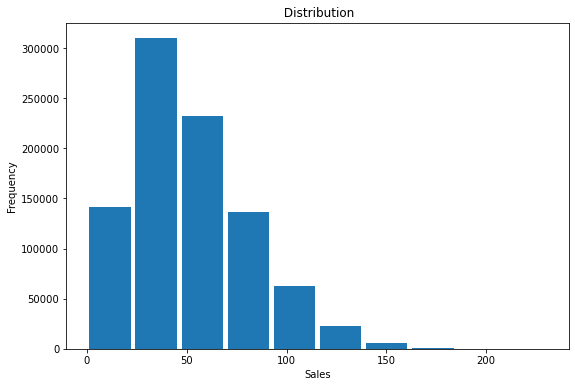

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
plt.hist(data['sales'], rwidth=0.9)
plt.title(' Distribution')
plt.ylabel('Frequency')
plt.xlabel('Sales')
plt.show()


In [9]:
import seaborn as sns

<Figure size 2880x720 with 0 Axes>

Text(0.5, 1.0, 'Number of passengers based on gender')

Text(0.5, 0, 'CompanyName')

Text(0, 0.5, 'count')

Text(-0.2, 18260, '\n18260')

Text(0.8, 18260, '\n18260')

Text(1.8, 18260, '\n18260')

Text(2.8000000000000003, 18260, '\n18260')

Text(3.8000000000000003, 18260, '\n18260')

Text(4.8, 18260, '\n18260')

Text(5.8, 18260, '\n18260')

Text(6.8, 18260, '\n18260')

Text(7.8, 18260, '\n18260')

Text(8.799999999999999, 18260, '\n18260')

Text(9.799999999999999, 18260, '\n18260')

Text(10.799999999999999, 18260, '\n18260')

Text(11.799999999999999, 18260, '\n18260')

Text(12.799999999999999, 18260, '\n18260')

Text(13.799999999999999, 18260, '\n18260')

Text(14.799999999999999, 18260, '\n18260')

Text(15.799999999999999, 18260, '\n18260')

Text(16.8, 18260, '\n18260')

Text(17.8, 18260, '\n18260')

Text(18.8, 18260, '\n18260')

Text(19.8, 18260, '\n18260')

Text(20.8, 18260, '\n18260')

Text(21.8, 18260, '\n18260')

Text(22.8, 18260, '\n18260')

Text(23.8, 18260, '\n18260')

Text(24.8, 18260, '\n18260')

Text(25.8, 18260, '\n18260')

Text(26.8, 18260, '\n18260')

Text(27.8, 18260, '\n18260')

Text(28.8, 18260, '\n18260')

Text(29.8, 18260, '\n18260')

Text(30.8, 18260, '\n18260')

Text(31.8, 18260, '\n18260')

Text(32.800000000000004, 18260, '\n18260')

Text(33.800000000000004, 18260, '\n18260')

Text(34.800000000000004, 18260, '\n18260')

Text(35.800000000000004, 18260, '\n18260')

Text(36.800000000000004, 18260, '\n18260')

Text(37.800000000000004, 18260, '\n18260')

Text(38.800000000000004, 18260, '\n18260')

Text(39.800000000000004, 18260, '\n18260')

Text(40.800000000000004, 18260, '\n18260')

Text(41.800000000000004, 18260, '\n18260')

Text(42.800000000000004, 18260, '\n18260')

Text(43.800000000000004, 18260, '\n18260')

Text(44.800000000000004, 18260, '\n18260')

Text(45.800000000000004, 18260, '\n18260')

Text(46.800000000000004, 18260, '\n18260')

Text(47.800000000000004, 18260, '\n18260')

Text(48.800000000000004, 18260, '\n18260')

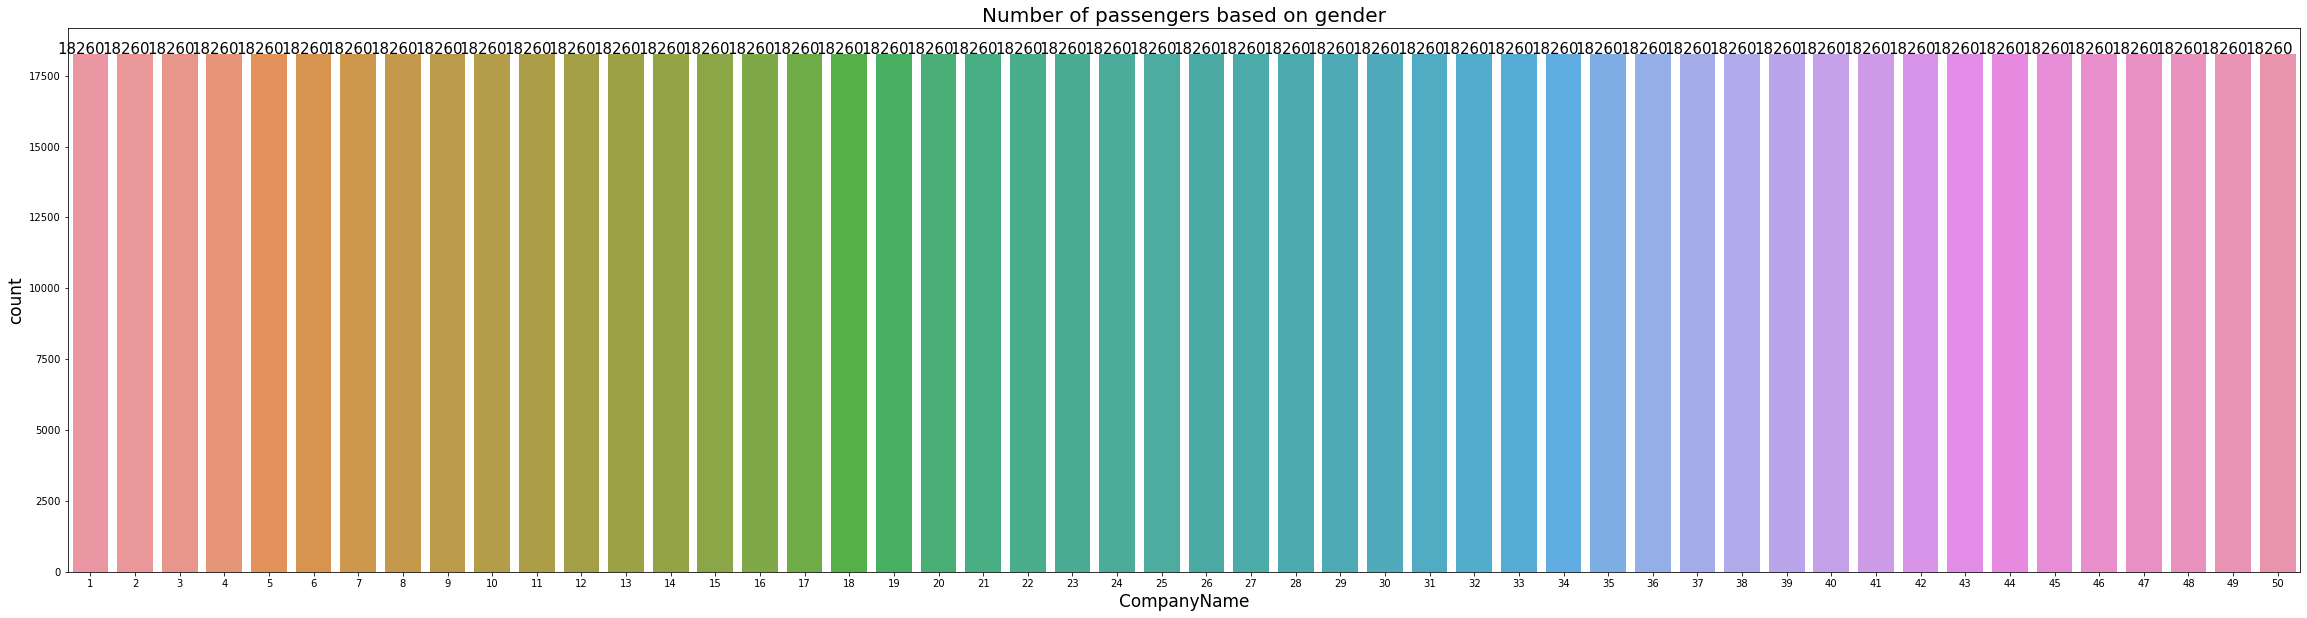

In [10]:
plt.figure(figsize = (40,10))
ax=sns.countplot(x = "item", data = data)
ax.set_title("Number of passengers based on gender", fontsize = 20)
plt.xlabel("CompanyName",fontsize=17)
plt.ylabel("count", fontsize=17)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=15, ha="center")

<Figure size 2880x720 with 0 Axes>

<AxesSubplot:xlabel='item', ylabel='sales'>

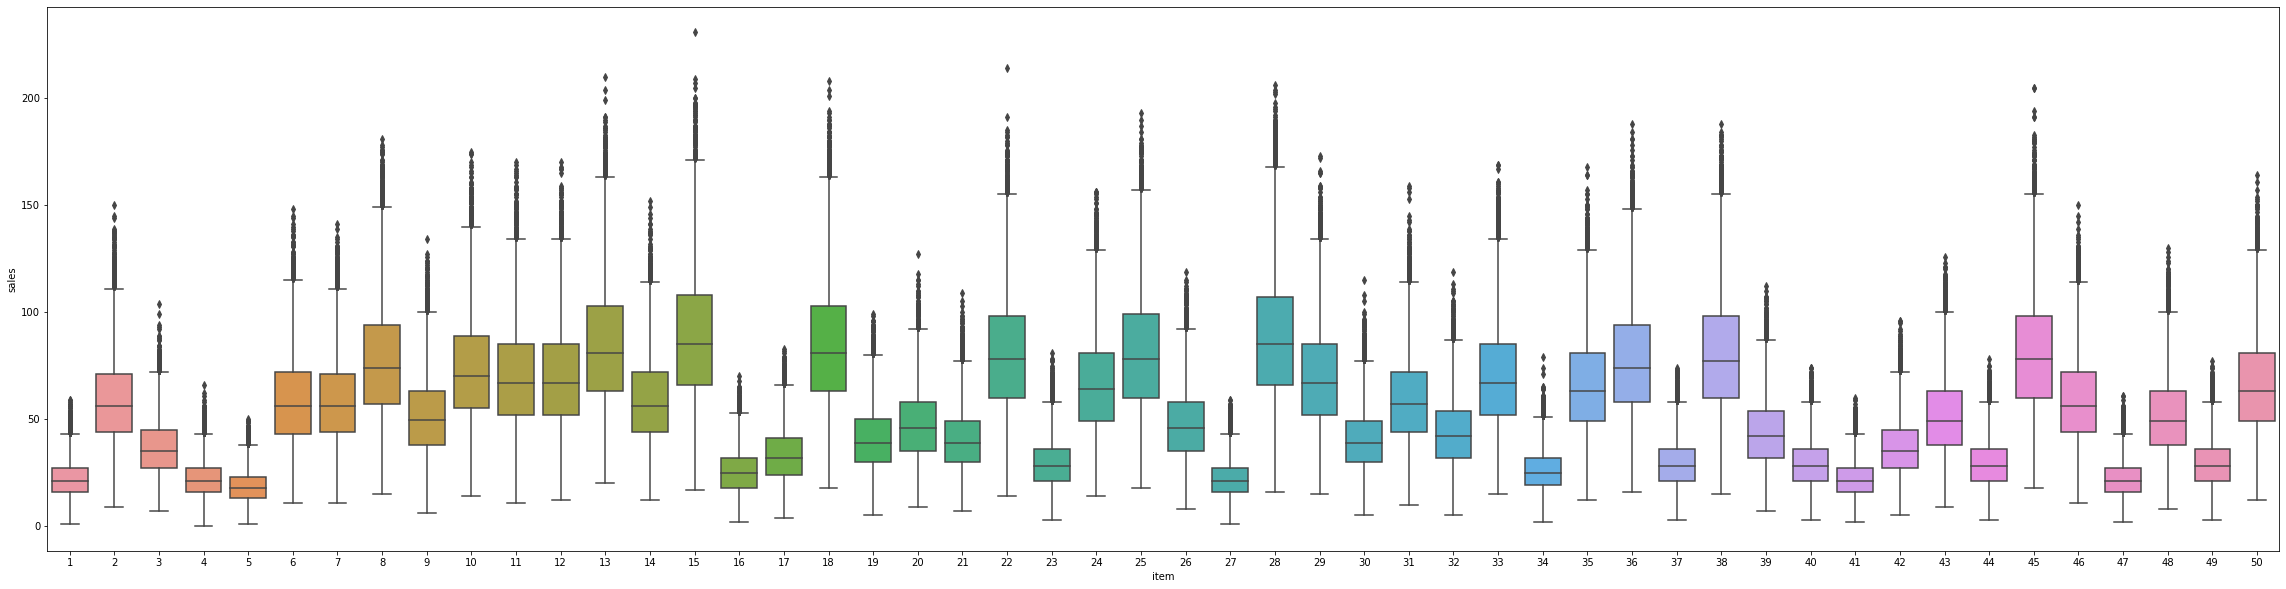

In [11]:
plt.figure(figsize = (40,10))
sns.boxplot(x = 'item', y = 'sales', data = data)
plt.show()

<Figure size 2880x720 with 0 Axes>

<AxesSubplot:xlabel='store', ylabel='sales'>

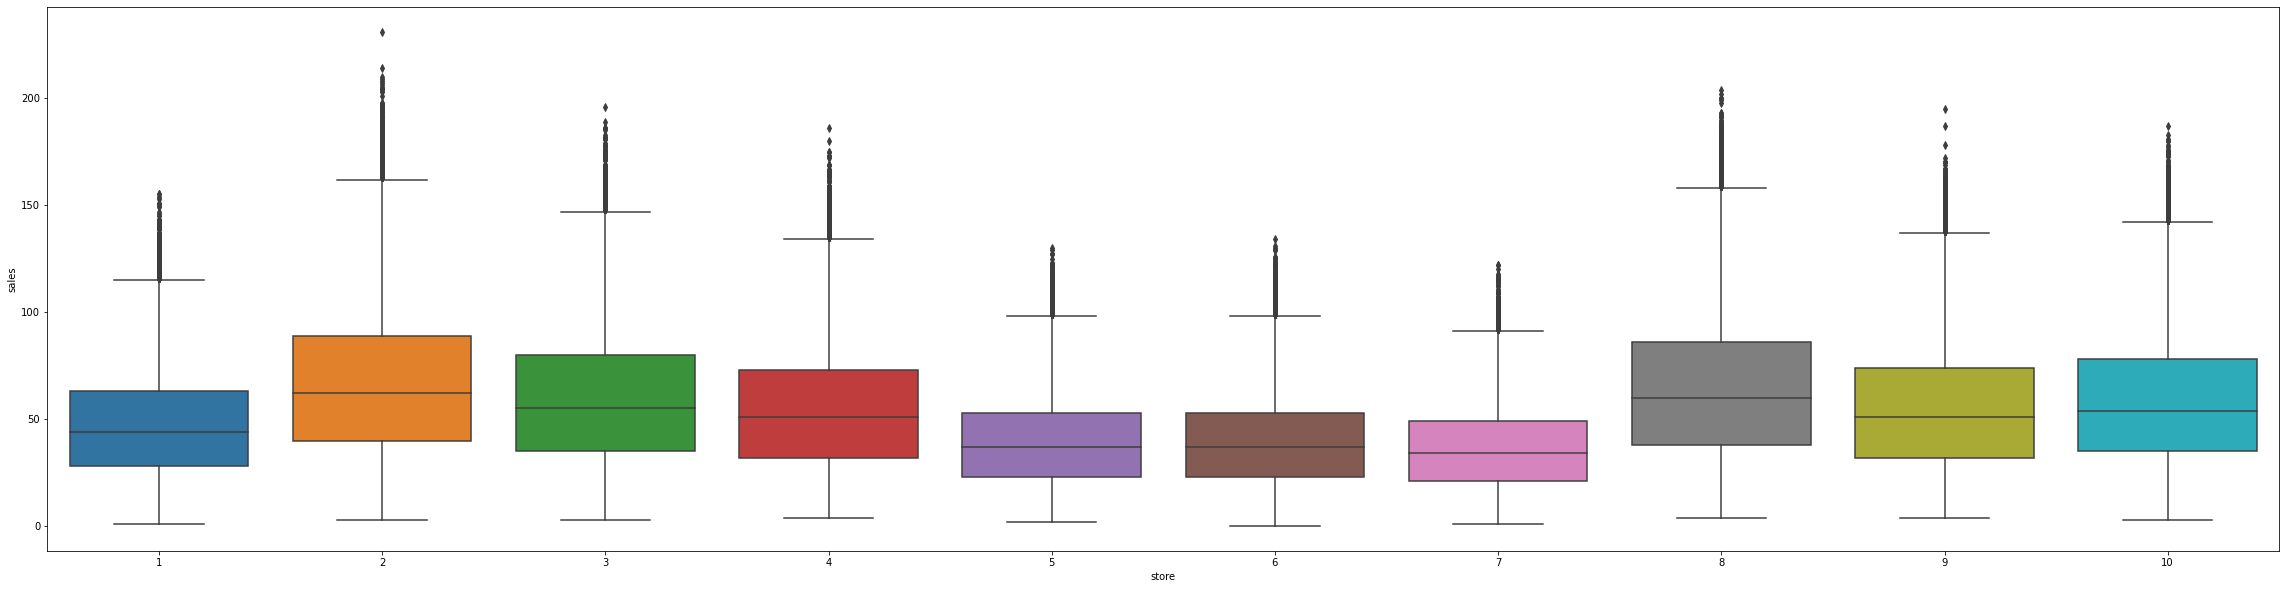

In [12]:
plt.figure(figsize = (40,10))
sns.boxplot(x = 'store', y = 'sales', data = data)
plt.show()

In [13]:
def is_outlier(s):
    q1 = s.quantile(0.25)
    q2 = s.quantile(0.75)
    IQR=q2-q1
    lower_limit = q1 - (1.5 * IQR)
    upper_limit = q2 + (1.25 * IQR)
    return ~s.between(lower_limit, upper_limit)

data = data[~data.groupby('item')['sales'].apply(is_outlier)]
data

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


<Figure size 2880x720 with 0 Axes>

<AxesSubplot:xlabel='item', ylabel='sales'>

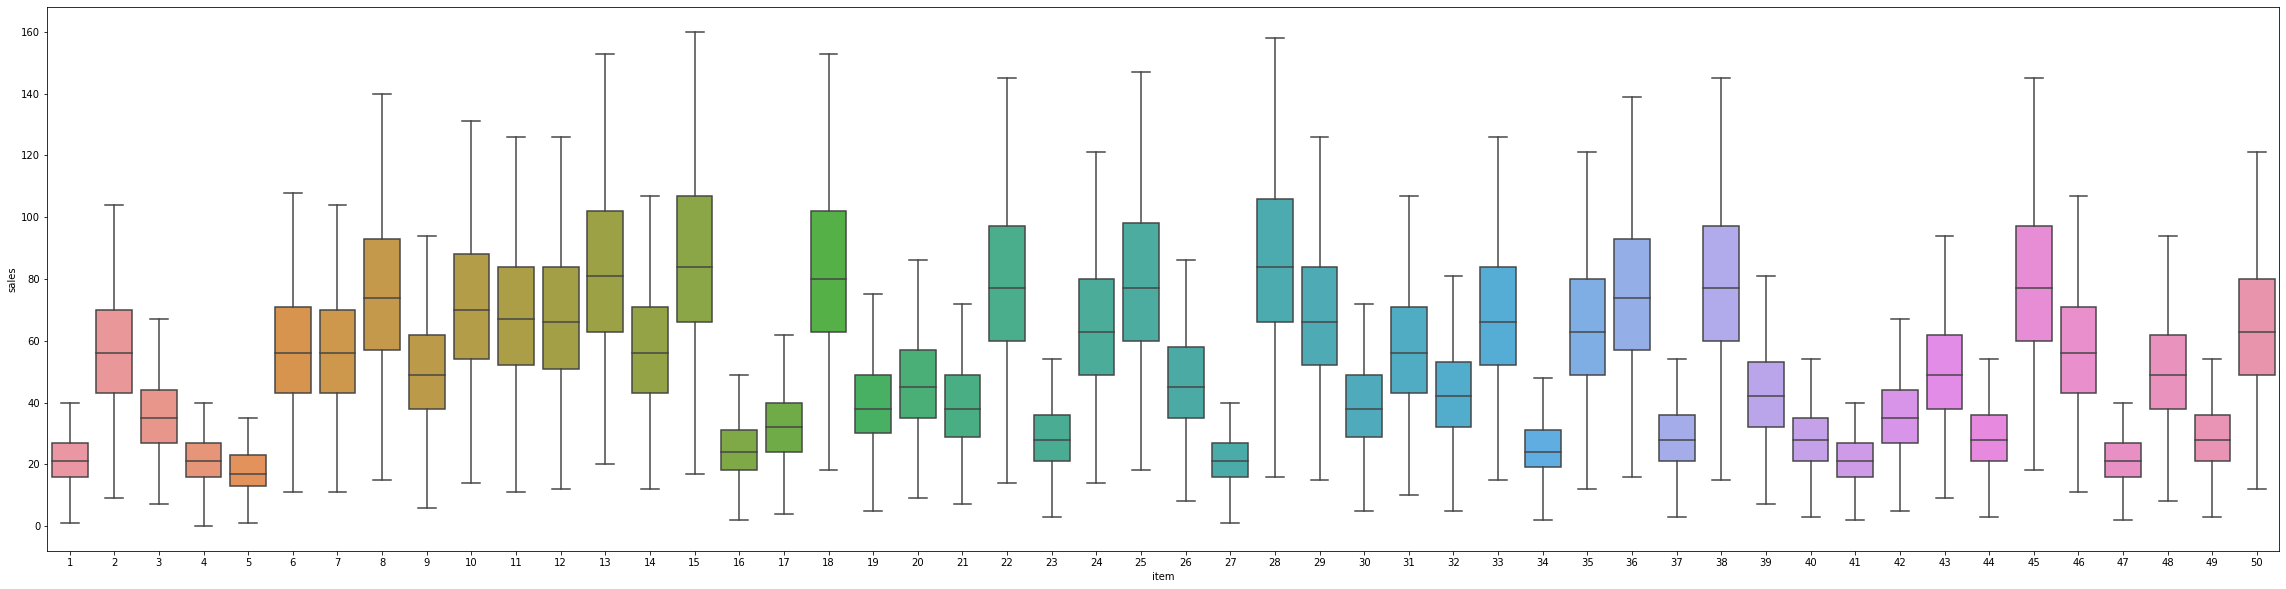

In [14]:
plt.figure(figsize = (40,10))
sns.boxplot(x = 'item', y = 'sales', data = data)
plt.show()

In [15]:
def is_outlier(s):
    q1 = s.quantile(0.25)
    q2 = s.quantile(0.75)
    IQR=q2-q1
    lower_limit = q1 - (1.5 * IQR)
    upper_limit = q2 + (1.5 * IQR)
    return ~s.between(lower_limit, upper_limit)

data2 = data2[~data2.groupby('store')['sales'].apply(is_outlier)]

<Figure size 2880x720 with 0 Axes>

<AxesSubplot:xlabel='store', ylabel='sales'>

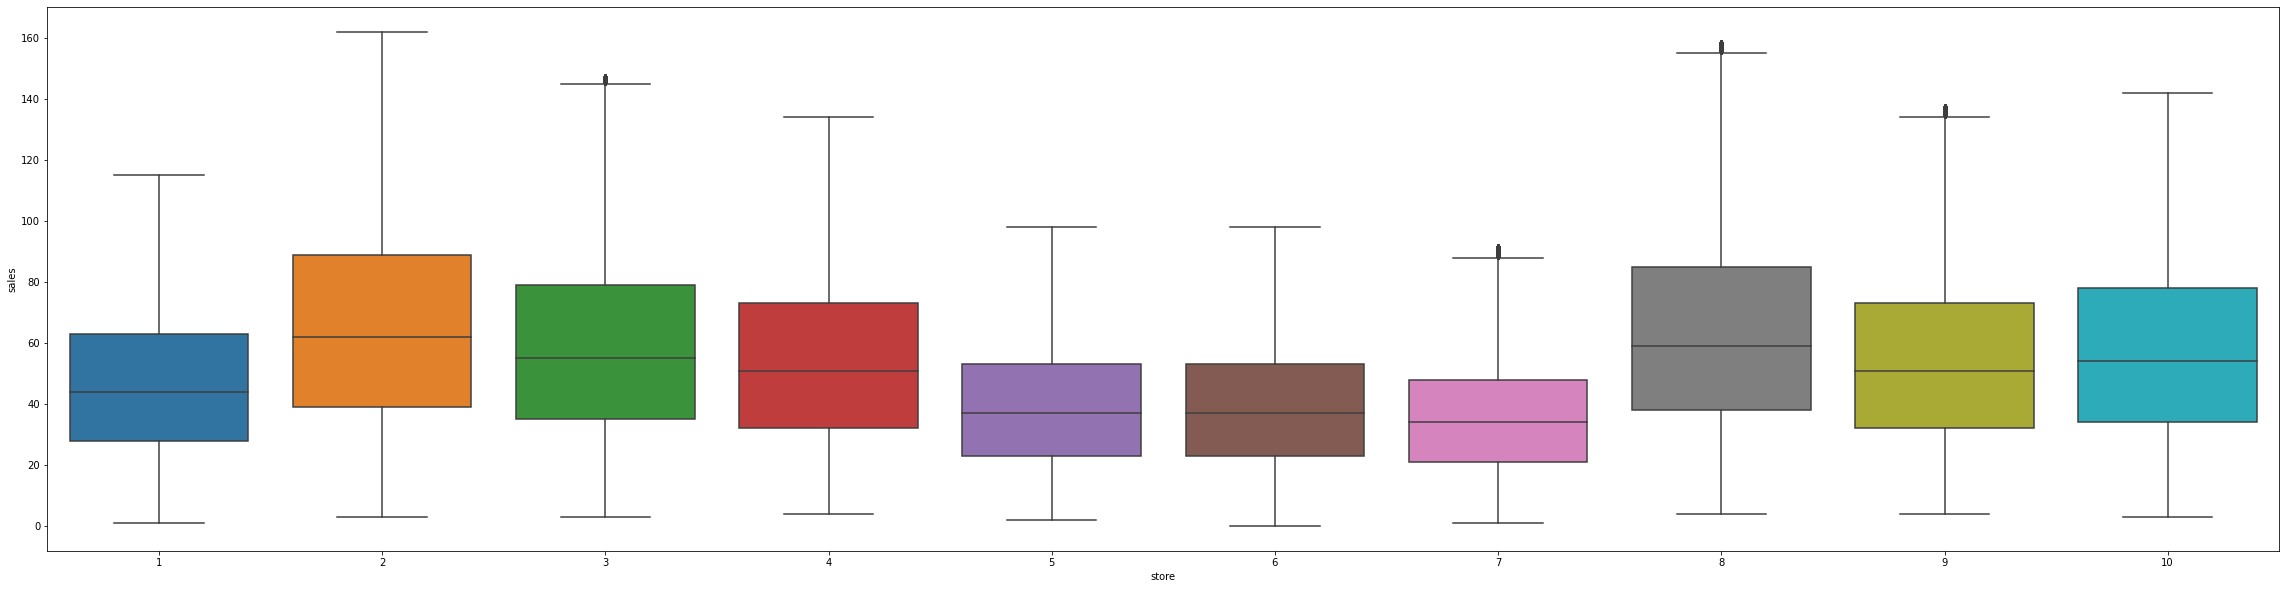

In [16]:
plt.figure(figsize = (40,10))
sns.boxplot(x = 'store', y = 'sales', data = data2)
plt.show()

In [17]:
train["date"] = pd.to_datetime(train["date"])
test["date"] = pd.to_datetime(test["date"])


In [18]:
train

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [19]:
train["year_month"] = train["date"].dt.to_period('M')
train["year_month"] = train["year_month"].astype(str)

In [20]:
df = train.groupby(["year_month", "store", "item"]).agg({"sales":"sum"})
df = df.reset_index()

In [21]:
df.head()

,year_month,store,item,sales
0,2013-01,1,1,328
1,2013-01,1,2,911
2,2013-01,1,3,547
3,2013-01,1,4,346
4,2013-01,1,5,276


In [22]:
df.tail()
df.info()

,year_month,store,item,sales
29995,2017-12,10,46,1723
29996,2017-12,10,47,626
29997,2017-12,10,48,1537
29998,2017-12,10,49,815
29999,2017-12,10,50,1987


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year_month  30000 non-null  object
 1   store       30000 non-null  int64 
 2   item        30000 non-null  int64 
 3   sales       30000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 937.6+ KB


In [23]:
df.groupby("store").agg({"sales":"sum"}).sort_values \
(by="sales", ascending=False).head()
df.groupby("store").agg({"sales":"sum"}).sort_values \
(by="sales").head()

,sales
store,
2,6120128
8,5856169
3,5435144
10,5360158
9,5025976


,sales
store,
7,3320009
6,3627670
5,3631016
1,4315603
4,5012639


In [24]:
df.groupby("item").agg({"sales":"sum"}).sort_values \
(by="sales", ascending=False).head()
df.groupby("item").agg({"sales":"sum"}).sort_values \
(by="sales").head()

,sales
item,
15,1607442
28,1604713
13,1539621
18,1538876
25,1473334


,sales
item,
5,335230
1,401384
41,401759
47,401781
4,401907


In [25]:
df.groupby("store").agg({"item":"count"}) #no missing values
df.groupby("store").agg({"sales":"sum"}).describe().T #no outlier for total 
#sales for stores. 

,item
store,
1,3000
2,3000
3,3000
4,3000
5,3000
6,3000
7,3000
8,3000
9,3000


,count,mean,std,min,25%,50%,75%,max
sales,10.0,4770451.2,990446.588081,3320009.0,3802162.75,5019307.5,5416397.5,6120128.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


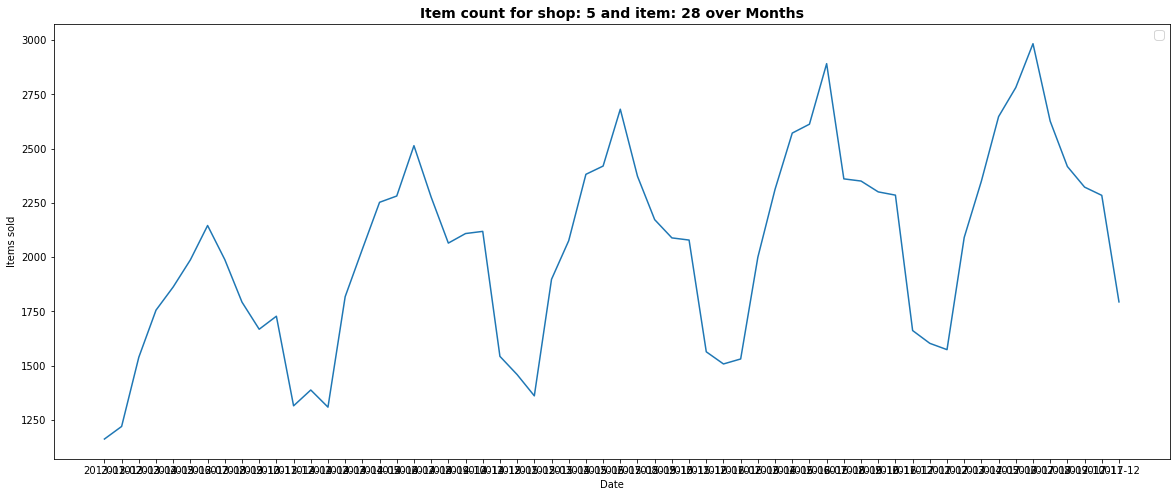

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


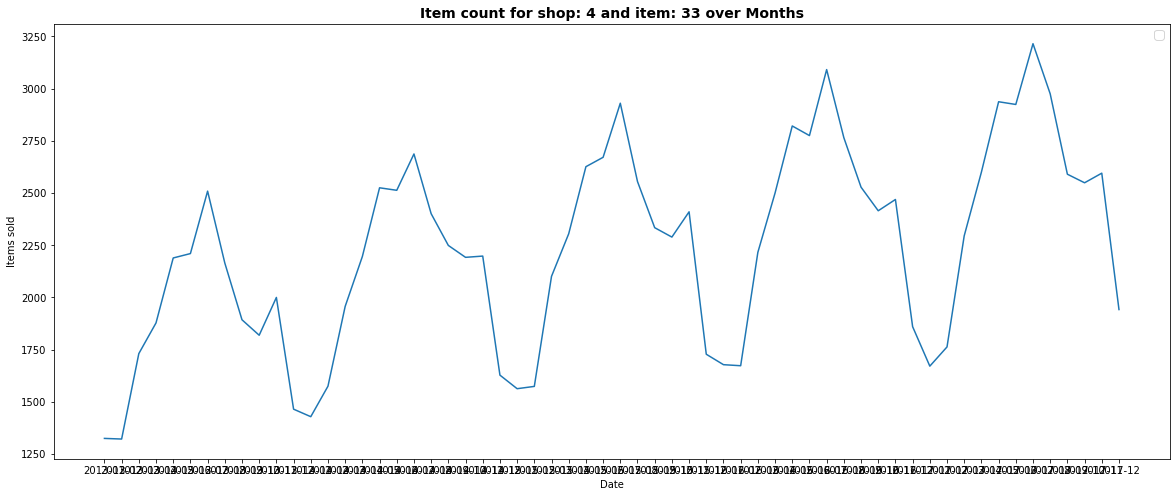

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


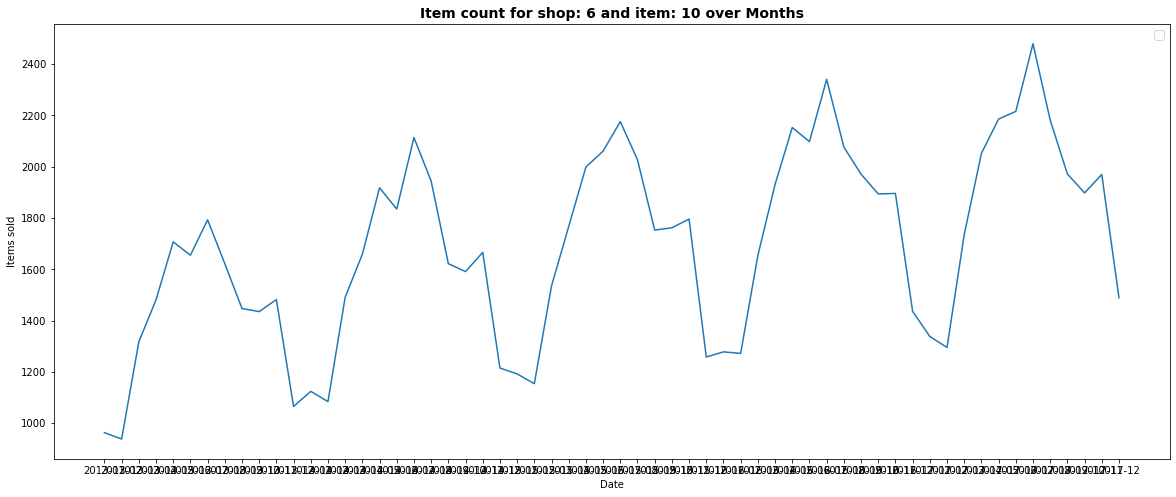

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


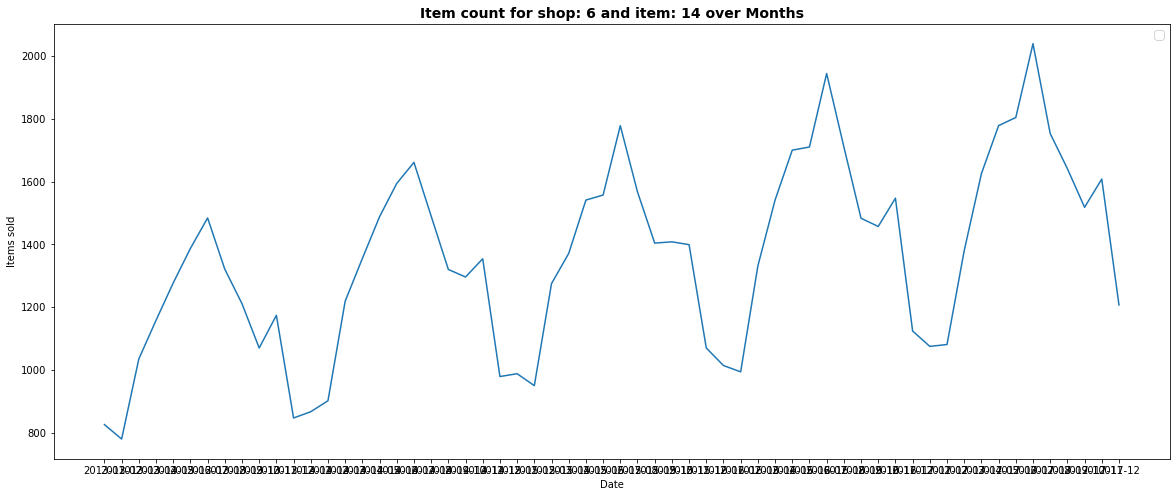

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


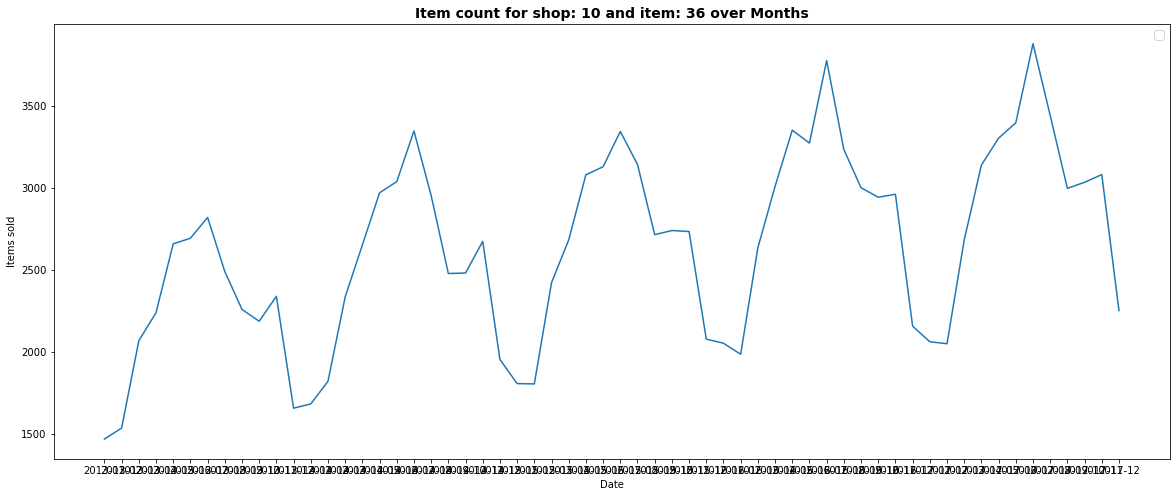

In [26]:
import matplotlib.pyplot as plt
from random import randint


def plot_sales(store_num, item_num):
    plt.figure(figsize = (20, 8))
    plt.plot(df.loc[(df["store"] == store_num) & 
                    (df["item"]==item_num),"year_month"], 
             df.loc[(df["store"] == store_num) & 
                    (df["item"]==item_num),"sales"])
    # başlık, etiketler ve eksenlerin stillerini güncelleme
    plt.title(f"Item count for shop: {store_num} and item: {item_num} over Months", 
              fontsize = 14, fontweight = "bold")
    plt.ylabel("Items sold")
    plt.xlabel("Date")
    plt.legend(fontsize = "large")
    plt.show()
for i in range(1,6):
    store_num = randint(1,10)
    item_num = randint(1,50)
    plot_sales(store_num,item_num)

#randomly chosen stores and items shows that, items sold at each store 
#follows seasonality and trend. Methods such as Single/Double Exp. Smoothing
#and ARIMA could not be able to perform well.

In [27]:
#Triple Exp. Smoothing
#We divide train set into train and test set, Our period is 12 and train 
#set for each item and store will be the dates between 01-2013 and 12-2016
#validation set will be between 01-2017 and 12-2017
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error
import itertools
import numpy as np
import warnings
warnings.filterwarnings('ignore')
alphas = betas = gammas = np.arange(0.20, 1, 0.10)
abg = list(itertools.product(alphas, betas, gammas))
#the function we use for hyperparameter optimization will be as follows
def tes_optimizer(train, test, abg, step=12):
    best_alpha, best_beta, best_gamma, best_mae = None, None, None, float("inf")
    for comb in abg:
        tes_model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12).\
            fit(smoothing_level=comb[0], smoothing_slope=comb[1], \
                smoothing_seasonal=comb[2])
        y_pred = tes_model.forecast(step)
        mae = mean_absolute_error(test, y_pred)
        if mae < best_mae:
            best_alpha, best_beta, best_gamma, best_mae = comb[0], comb[1], \
            comb[2], mae
    return best_alpha, best_beta, best_gamma, best_mae

df_train = df.loc[(df["store"]==1) & (df["item"]==1),
                         "sales"][:47]
df_val = df.loc[(df["store"]==1) & (df["item"]==1),
                         "sales"][48:]

best_alpha, best_beta, best_gamma, best_mae = \
tes_optimizer(df_train, df_val, abg)

best_alpha, best_beta, best_gamma, best_mae

(0.30000000000000004,
 0.6000000000000001,
 0.5000000000000001,
 48.21777222007364)

In [28]:
#SARIMA MODEL
from statsmodels.tsa.statespace.sarimax import SARIMAX

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

def sarima_optimizer_mae(train, test, pdq, seasonal_pdq):
    best_mae, best_order, best_seasonal_order = float("inf"), None, None
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                model = SARIMAX(train, order=param, seasonal_order=param_seasonal)
                sarima_model = model.fit(disp=0)
                y_pred_test = sarima_model.get_forecast(steps=12)
                y_pred = y_pred_test.predicted_mean
                mae = mean_absolute_error(test, y_pred)
                if mae < best_mae:
                    best_mae, best_order, best_seasonal_order = mae, param, param_seasonal
            except:
                continue    
    return best_order, best_seasonal_order, best_mae

best_order, best_seasonal_order, best_mae_sarima = sarima_optimizer_mae(df_train, df_val, 
                                                       pdq, seasonal_pdq)

best_order, best_seasonal_order, best_mae_sarima

((0, 0, 0), (1, 0, 1, 12), 44.4502752318047)